**Importing all the required library:-**

In [2]:
!unzip /content/drive/MyDrive/embeddings.zip -d /content/

Archive:  /content/drive/MyDrive/embeddings.zip
   creating: /content/GoogleNews-vectors-negative300/
   creating: /content/glove.840B.300d/
   creating: /content/paragram_300_sl999/
   creating: /content/wiki-news-300d-1M/
  inflating: /content/glove.840B.300d/glove.840B.300d.txt  
  inflating: /content/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin  
  inflating: /content/wiki-news-300d-1M/wiki-news-300d-1M.vec  
  inflating: /content/paragram_300_sl999/README.txt  
  inflating: /content/paragram_300_sl999/paragram_300_sl999.txt  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib 
import matplotlib as mpl 
import seaborn as sns
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
import string, re
from keras.preprocessing.text import Tokenizer
import string
import scipy
import warnings
import sklearn as sk
import csv
import os
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords 
import nltk
import json
import sys
import os
import time
from tqdm import tqdm
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, concatenate
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

<a id="553"></a> <br>
##Stop words
Downloading various packages of nltk like stopwords,punkt for removing stopwords:-


**Downloading the nltk package for stopwords:-**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Downloading the nltk package for punctuation:-

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**importing stopwords module**

In [ ]:
from nltk.corpus import stopwords

**From the below statement we get the list of all the stopwords**

In [ ]:
stopword = set(stopwords.words('english'))

In [ ]:
print(len(stopword))
print(stopword)

179
{"you've", 'each', 'she', 'through', 'been', 'it', 'were', 'such', 'wasn', "needn't", 'of', "should've", 'themselves', 'aren', 'm', 'during', 'no', 'some', 'until', 'are', 'because', 'he', 'here', 'same', 'yours', 'hasn', 'other', 'into', "don't", "mightn't", "weren't", 'why', 'but', 'won', 'can', 'while', "she's", 'them', 'am', 'too', "haven't", 'when', 'before', 'few', 'between', 'her', 'than', 'they', "it's", 'll', 'over', 'any', 'has', 'both', 'once', 'yourselves', 'myself', 'just', 'below', 'y', 'him', 'me', 'being', 'further', 'under', "shouldn't", 'theirs', 'don', 'herself', 'hers', 'most', 'had', 'will', 'nor', 'how', 'if', "hadn't", 'yourself', 'doing', "hasn't", 'needn', 'you', "wasn't", 're', 'couldn', 'does', "isn't", 'its', 'do', 'doesn', 'about', 'my', 'should', 'up', 'ourselves', 'from', 'now', 'very', 'by', 'itself', 'again', 'their', "you'd", 's', "that'll", 'after', 'there', 'or', 'not', 'with', 'having', 'these', 'mustn', 'this', "didn't", 'who', 'then', 'and', '

**Observations:The returned list stopword contains 179 stop words which means we will be going to remove all this 179 words from the question_text column from the data.**

<a id="6"></a> <br>
## Exploratory Data Analysis and Preprocessing
We will be doing exploratory data analysis and preprocessing in below four steps:-
1. Gathering Data
1. Data Visualization
1. Data Scrubbing
1. Data Preprocessing



##Gathering Data:-


In [5]:
train =  pd.read_csv("/content/drive/My Drive/train.csv")
test  =  pd.read_csv("/content/drive/My Drive/test.csv")
print("Training data shape : ", train.shape)
print("Testing  data shape : ", test.shape)

Training data shape :  (1306122, 3)
Testing  data shape :  (375806, 2)


In [6]:
train = train.sample(frac=0.1, replace=False, random_state=1)


**The below functions clean_word used to preprocess the text by using various technique of regular expression:-**

In [ ]:
def clean_word(word):
    word = re.sub(r"(\d+)(k)", r"\g<1>000", word)
    word = re.sub(r":", " : ", word)
    word = re.sub(r" e g ", " eg ", word)
    word = re.sub(r" b g ", " bg ", word)
    word = re.sub(r" u s ", " american ", word)
    word = re.sub(r"\0s", "0", word)
    word = re.sub(r",", " ", word)
    word = re.sub(r"\.", " ", word)
    word = re.sub(r"!", " ! ", word)
    word = re.sub(r"\/", " ", word)
    word = re.sub(r"\^", " ^ ", word)
    word = re.sub(r"\+", " + ", word)
    word = re.sub(r"\-", " - ", word)
    word = re.sub(r"\=", " = ", word)
    word = re.sub(r" 9 11 ", "911", word)
    word = word.translate(string.punctuation)
    word = word.lower()
    word = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", word)
    word = re.sub(r"what's", "what is ", word)
    word = re.sub(r"\'s", " ", word)
    word = re.sub(r"\'ve", " have ", word)
    word = re.sub(r"n't", " not ", word)
    word = re.sub(r"i'm", "i am ", word)
    word = re.sub(r"\'re", " are ", word)
    word = re.sub(r"\'d", " would ", word)
    word = re.sub(r"\'ll", " will ", word)
    word = re.sub(r"'", " ", word)
    word = re.sub(r"e - mail", "email", word)
    word = re.sub(r"j k", "jk", word)
    word = re.sub(r"\s{2,}", " ", word)
    word = re.sub('[^a-zA-Z]',' ', word)
    word = re.sub('  +',' ',word)
    return word

**The below functions load_and_preprocess used to load and preprocess the data:-**

In [ ]:
def load_and_preprocess():
    train = pd.read_csv("/content/drive/MyDrive/train.csv")
    test = pd.read_csv("/content/drive/MyDrive/test.csv")
    print("Test shape : ",test.shape)
    
    train['clean_text'] = train['question_text'].apply(clean_word)
    test['clean_text'] = test['question_text'].apply(clean_word)
    
    ## split to train and val
    train, val = train_test_split(train, test_size=0.08, random_state=2018)


    ## fill up the missing values
    train_X = train["clean_text"].fillna("_##_").values
    val_X = val["clean_text"].fillna("_##_").values
    test_X = test["clean_text"].fillna("_##_").values
    
    ## Tokenize the sentences
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(train_X))
    train_X = tokenizer.texts_to_sequences(train_X)
    val_X = tokenizer.texts_to_sequences(val_X)
    test_X = tokenizer.texts_to_sequences(test_X)

    ## Pad the sentences 
    train_X = pad_sequences(train_X, maxlen=maxlen)
    val_X = pad_sequences(val_X, maxlen=maxlen)
    test_X = pad_sequences(test_X, maxlen=maxlen)

    ## Get the target values
    train_y = train['target'].values
    val_y = val['target'].values  
    
    #shuffling the data
    np.random.seed(2018)
    trn_idx = np.random.permutation(len(train_X))
    val_idx = np.random.permutation(len(val_X))

    train_X = train_X[trn_idx]
    
    val_X = val_X[val_idx]
    
    train_y = train_y[trn_idx]
    
    val_y = val_y[val_idx]    
    
    return train_X, val_X, test_X, train_y, val_y, tokenizer.word_index

**The below functions load_glove_vector used to convert the text i.e index value into 300 dimesion vectors and with the help of that we will be creating an embedding matrix and finally return that embedding matrix:-**

In [ ]:
def load_glove_vector(word_index):
    embedding_file = '/content/drive/MyDrive/glove.840B.300d/glove.840B.300d.txt'
    def get_coefs(word,*arr): 
      return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(embedding_file))
    all_embedding = np.stack(embeddings_index.values())
    embedding_mean,embedding_std = all_embedding.mean(), all_embedding.std()
    embedding_size = all_embedding.shape[1]
    n_b_words = min(max_features, len(word_index))
    embedding_matrix = np.random.normal(embedding_mean,embedding_std,(n_b_words,embedding_size))
    for word, i in word_index.items():
        if i >= max_features: 
          continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
          embedding_matrix[i] = embedding_vector       
    return embedding_matrix    

In [ ]:
def load_fast_text(word_index):    
    embedding_file = '/content/drive/MyDrive/wiki-news-300d-1M/wiki-news-300d-1M.vec'
    def get_coefs(word,*arr): 
      return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(embedding_file) if len(o)>100)
    all_embedding = np.stack(embeddings_index.values())
    embedding_mean,embedding_std = all_embedding.mean(), all_embedding.std()
    embedding_size = all_embedding.shape[1]
    n_b_words = min(max_features, len(word_index))
    embedding_matrix = np.random.normal(embedding_mean, embedding_std, (n_b_words, embedding_size))
    for word, i in word_index.items():
        if i >= max_features: 
          continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
          embedding_matrix[i] = embedding_vector       
    return embedding_matrix    

In [ ]:
def load_paragraph(word_index):
    embedding_file = '/content/drive/MyDrive/paragram_300_sl999/paragram_300_sl999.txt'
    def get_coefs(word,*arr): 
      return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(embedding_file, encoding="utf8", errors='ignore') if len(o)>100)
    all_embedding = np.stack(embeddings_index.values())
    embedding_mean,embedding_std = all_embedding.mean(), all_embedding.std()
    embedding_size = all_embedding.shape[1]
    n_b_words = min(max_features, len(word_index))
    embedding_matrix = np.random.normal(embedding_mean, embedding_std, (n_b_words, embedding_size))
    for word, i in word_index.items():
        if i >= max_features: 
          continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
          embedding_matrix[i] = embedding_vector       
    return embedding_matrix    

**model_lstm_du function is used to train the LSTM model on the textual data after featurisation and feature engineering:-**

In [ ]:
def model_lstm_du(embedding_matrix):
    input = Input(shape=(maxlen,))
    X = Embedding(max_features, embed_size, weights=[embedding_matrix])(input)
    X = Bidirectional(CuDNNGRU(64, return_sequences=True))(X)
    average_pooling = GlobalAveragePooling1D()(X)
    max_pooling = GlobalMaxPooling1D()(X)
    concat = concatenate([average_pooling,max_pooling])
    concat = Dense(64, activation="relu")(concat)
    concat = Dropout(0.1)(concat)
    output = Dense(1, activation="sigmoid")(concat)
    model = Model(inputs=input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

**The below function will take the model as the input and return pred_val_y, pred_test_y, best_score**

In [ ]:
def train_pred(model, epochs=2):
    for i in range(epochs):
        model.fit(train_data_X, train_y, batch_size=512, epochs=1, validation_data=(val_data_X, val_y))
        pred_val_y = model.predict([val_data_X], batch_size=1024, verbose=0)
        best_threshold = 0.5
        best_score = 0.0
        for threshold in np.arange(0.1, 0.501, 0.01):
            threshold = np.round(threshold, 2)
            score = metrics.f1_score(val_y, (pred_val_y > threshold).astype(int))
            if score > best_score:
                best_threshold = threshold
                best_score = score
        print("Val F1 Score: {:.4f}".format(best_score))
    pred_test_y = model.predict([test_data_X], batch_size=1024, verbose=0)
    return pred_val_y, pred_test_y, best_score

**Feature information:-**

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130612 entries, 414550 to 1056019
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            130612 non-null  object
 1   question_text  130612 non-null  object
 2   target         130612 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.0+ MB
None


**Observation:Train dataset contains 3 column qid,question_text,target**

In [ ]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB
None


**Observation:Test dataset contains 3 column qid,question_text,target**

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
type(test)

pandas.core.frame.DataFrame

**description of train dataset**

In [ ]:
train.describe() 

,target
count,130612.000000
mean,0.062835
std,0.242667
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Check whether dataset contain any null value or not:-**

In [ ]:
train.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64


**Observation:**
**As we seen above there is no null values,so we have not to fillna() values.** 





**number of unique item for Target**

In [ ]:
train_target = train['target'].values
np.unique(train_target) 

array([0, 1])

**Observation:We can see that this is a binary class classification problem:-**

**Text Pre-processing Techniques**


In [ ]:
X_train = train["question_text"].fillna("dieter").values
X_test = test["question_text"].fillna("dieter").values
y = train["target"]
text = train['question_text']

for row in text[:10]:
    print(row)

How likely is gay marriage being legalized in the Republic of China this year (2017)?
Is politics the most corrupt profession?
How do I get a walk up campsite at Yosemite?
How was Banner Health established?
Do you feel proud or ashamed telling that you work in insurance industry because people run away from insurance agent?
When did the line between Light/heavy/medium tanks start to blur into the first signs of the MBT?
What are some well known stories of a blessing actually being a curse?
What do you think is the ratio of students from private and government schools who have enrolled for online learning platforms such as Byju's etc.?
If person turns data off and then reply someone does it then show the new last seen?
What were William John "Bill" Nixon's major accomplishments as a footballer?


**The below function is used to Remove Integers from each row of question_text column:-**

In [ ]:
def removeintegers(text):
    texts=''
    for i in text:
      if not i.isdigit():
        texts+=i     
    return texts

text_removeintegers = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_removeintegers['TextBefore'] = text.copy()

In [ ]:
for index, row in text_removeintegers.iterrows():
    row['TextAfter'] = removeintegers(row['TextBefore'])

In [ ]:
for index, rows in text_removeintegers[text_removeintegers['Changed']=='yes'].head().iterrows():
    print(rows['TextBefore'],'->',rows['TextAfter'])

**importing regular expression library:-**

In [ ]:
import re 

The below function will replace repetitions of:-

*   exlamation marks
*   stop marks
*   question marks

In [ ]:
def replace(text):
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

text_replaceRepOfPunct = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_replaceRepOfPunct['TextBefore'] = text.copy()

In [ ]:
for index, row in text_replaceRepOfPunct.iterrows():
    row['TextAfter'] = replace(row['TextBefore'])

In [ ]:
text_replaceRepOfPunct['Changed'] = np.where(text_replaceRepOfPunct['TextBefore']==text_replaceRepOfPunct['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes']), len(text_replaceRepOfPunct), 100*len(text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes'])/len(text_replaceRepOfPunct)))

84 of 130612 (0.0643%) questions have been changed.


In [ ]:
for index, row in text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

WHY SO MANY BLACK people THAT MADE VIDEOS THAT THEY are the ISRAELITES ..BUT CAN'T ever SHOW PROOF? ARE THEY ONLY MAKING VIDEOS JUST TO HATE the WHITE people? -> WHY SO MANY BLACK people THAT MADE VIDEOS THAT THEY are the ISRAELITES  multiStop BUT CAN'T ever SHOW PROOF? ARE THEY ONLY MAKING VIDEOS JUST TO HATE the WHITE people?
Can I restore data after deleted my account once..i have local backup? -> Can I restore data after deleted my account once multiStop i have local backup?
How can I begin this sentence with 'In all..'…"John has probably forgotten the date of the examination"? -> How can I begin this sentence with 'In all multiStop '…"John has probably forgotten the date of the examination"?
Which external hard drive is better Seagate or WD elements and why? Share your experience if u have used them please .. It's urgent I want to buy one -> Which external hard drive is better Seagate or WD elements and why? Share your experience if u have used them please  multiStop  It's urgent 

In [ ]:
text_lowercase = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_lowercase['TextBefore'] = text.copy()

In [ ]:
for index, row in text_lowercase.iterrows():
    row['TextAfter'] = row['TextBefore'].lower()

In [ ]:
text_lowercase['Changed'] = np.where(text_lowercase['TextBefore']==text_lowercase['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_lowercase[text_lowercase['Changed']=='yes']), len(text_lowercase), 100*len(text_lowercase[text_lowercase['Changed']=='yes'])/len(text_lowercase)))

130581 of 130612 (99.9763%) questions have been changed.


In [ ]:
for index, row in text_lowercase[text_lowercase['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])


How likely is gay marriage being legalized in the Republic of China this year (2017)? -> how likely is gay marriage being legalized in the republic of china this year (2017)?
Is politics the most corrupt profession? -> is politics the most corrupt profession?
How do I get a walk up campsite at Yosemite? -> how do i get a walk up campsite at yosemite?
How was Banner Health established? -> how was banner health established?
Do you feel proud or ashamed telling that you work in insurance industry because people run away from insurance agent? -> do you feel proud or ashamed telling that you work in insurance industry because people run away from insurance agent?


In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer() #set stemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() # set lemmatizer

def tokenize(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        finalTokens.append(stemmer.stem(w)) # change this to lemmatizer.lemmatize(w) for Lemmatizing
    text = " ".join(finalTokens)
    return text

text_stemming = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_stemming['TextBefore'] = text.copy()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
for index, row in text_stemming.iterrows():
    row['TextAfter'] = tokenize(row['TextBefore'])

In [ ]:
text_stemming['Changed'] = np.where(text_stemming['TextBefore'].str.replace(" ","")==text_stemming['TextAfter'].str.replace(" ","").str.replace("``",'"').str.replace("''",'"'), 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_stemming[text_stemming['Changed']=='yes']), len(text_stemming), 100*len(text_stemming[text_stemming['Changed']=='yes'])/len(text_stemming)))

130118 of 130612 (99.6218%) questions have been changed.


In [ ]:
for index, row in text_stemming[text_stemming['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

How likely is gay marriage being legalized in the Republic of China this year (2017)? -> how like is gay marriag be legal in the republ of china thi year ( 2017 ) ?
Is politics the most corrupt profession? -> Is polit the most corrupt profess ?
How do I get a walk up campsite at Yosemite? -> how do I get a walk up campsit at yosemit ?
How was Banner Health established? -> how wa banner health establish ?
Do you feel proud or ashamed telling that you work in insurance industry because people run away from insurance agent? -> Do you feel proud or asham tell that you work in insur industri becaus peopl run away from insur agent ?


**Data Preprocessing**


In pandas's data frame you can perform some query such as "where" to check the number of insincere question asked in the dataset:-

In [ ]:
train.where(train ['target']==1).count()

qid              8207
question_text    8207
target           8207
dtype: int64

**Observations:-Number of insincere questions asked in the whole training data is**

**Below are some examples of questions that they are insincere**

In [ ]:
train[train['target']==1].head(5)

,qid,question_text,target
489968,5ff540fc9f29a921e994,Are people that travel to Thailand and Philipp...,1
795771,9bf13f814d0791416bd7,Why do lawyers take money from the opposite pa...,1
940763,b860b206b65f3378d241,Trump continues to color his hair and skin. Di...,1
907933,b1e7a27d8cffaf036e0a,Is the Indian Congress the second Nazi? They b...,1
241353,2f34d61296a31a1570bf,Do the members of Rajya Sabha need a girlfriend?,1


**We will be applying below Feature Engeeinering technique to get more features from the textual data:-**

(https://www.kaggle.com/tunguz/just-some-simple-eda) are:
1. Number of words in the text
1. Number of unique words in the text
1. Number of characters in the text
1. Number of stopwords
1. Number of punctuations
1. Number of upper case words
1. Number of title case words
1. Average length of the words


**Word Cloud for the text data:-**

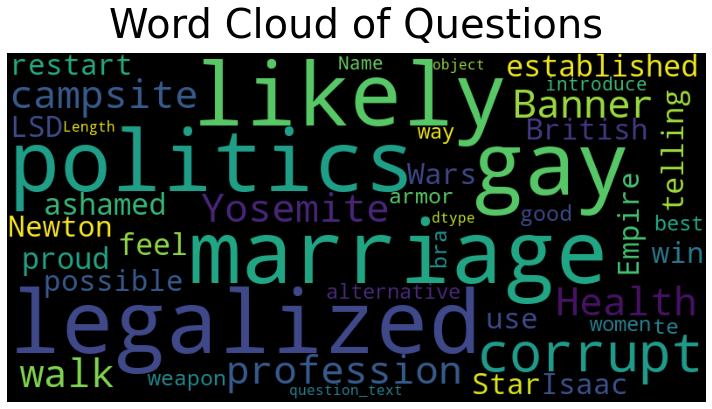

In [ ]:
from wordcloud import WordCloud, STOPWORDS
#https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,6), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(train["question_text"], title="Word Cloud of Questions")

In [ ]:
sincere = train[train.target==0].question_text.apply(lambda x: x.lower().split())
insincere = train[train.target==1].question_text.apply(lambda x: x.lower().split())

**Observations:-**
We will store the sincere and insincere words in the list.

In [ ]:
print('Number of sincere words',len(sincere))
print('Number of insincere words',len(insincere))

Number of sincere words 122405
Number of insincere words 8207


**Number of words in the text:-**

In [ ]:
#https://www.kaggle.com/tunguz/just-some-simple-eda
train["num_words"] = train["question_text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["question_text"].apply(lambda x: len(str(x).split()))


#printing the no of words in train
print('maximum of num_words in train',train["num_words"].max())
print('min of num_words in train',train["num_words"].min())

#printing the no of words in test
print("maximum of  num_words in test",test["num_words"].max())
print('min of num_words in train',test["num_words"].min())


maximum of num_words in train 62
min of num_words in train 1
maximum of  num_words in test 87
min of num_words in train 1


**Number of unique words in the text:-**

In [ ]:
#https://www.kaggle.com/tunguz/just-some-simple-eda
train["num_unique_words"] = train["question_text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["question_text"].apply(lambda x: len(set(str(x).split())))

#printing the no of unique words in train
print('maximum of num_unique_words in train',train["num_unique_words"].max())
print('mean of num_unique_words in train',train["num_unique_words"].mean())

#printing the no of unique words in test
print("maximum of num_unique_words in test",test["num_unique_words"].max())
print('mean of num_unique_words in train',test["num_unique_words"].mean())

maximum of num_unique_words in train 52
mean of num_unique_words in train 12.149098092058923
maximum of num_unique_words in test 61
mean of num_unique_words in train 12.144194078859837


**Number of stopwords in the text**

In [ ]:
#https://www.kaggle.com/tunguz/just-some-simple-eda
train["num_chars"] = train["question_text"].apply(lambda x: len(str(x)))
test["num_chars"] = test["question_text"].apply(lambda x: len(str(x)))

#Printing the no of characters in the text
print('maximum of num_chars in train',train["num_chars"].max())
print("maximum of num_chars in test",test["num_chars"].max())

maximum of num_chars in train 312
maximum of num_chars in test 991


**Number of punctuations in the text:-**

In [ ]:
#https://www.kaggle.com/tunguz/just-some-simple-eda
train["num_punctuations"] =train['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

print('maximum of num_punctuations in train',train["num_punctuations"].max())
print("maximum of num_punctuations in test",test["num_punctuations"].max())

maximum of num_punctuations in train 96
maximum of num_punctuations in test 505


**Number of title case words in the text:-**

In [ ]:
#https://www.kaggle.com/tunguz/just-some-simple-eda
train["num_words_upper"] = train["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test["num_words_upper"] = test["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

print('maximum of num_words_upper in train',train["num_words_upper"].max())
print("maximum of num_words_upper in test",test["num_words_upper"].max())

maximum of num_words_upper in train 33
maximum of num_words_upper in test 39


**Number of title case words in the text:-**

In [ ]:
#https://www.kaggle.com/tunguz/just-some-simple-eda
train["num_words_title"] = train["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
test["num_words_title"] = test["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

print('maximum of num_words_title in train',train["num_words_title"].max())
print("maximum of num_words_title in test",test["num_words_title"].max())

maximum of num_words_title in train 30
maximum of num_words_title in test 29


**Average length of the words in the text:-**

In [ ]:
#https://www.kaggle.com/tunguz/just-some-simple-eda
train["mean_word_len"] = train["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test["mean_word_len"] = test["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

print('mean_word_len in train',train["mean_word_len"].max())
print("mean_word_len in test",test["mean_word_len"].max())

mean_word_len in train 38.333333333333336
mean_word_len in test 329.6666666666667


**By doing above featurisations we have increased the number of column for the training and testing data:-**

**Now check the various columns after doing featurisations in the training data:-**

In [ ]:
print(train.columns)
train.head(5)

Index(['qid', 'question_text', 'target', 'num_words', 'num_unique_words',
       'num_chars', 'num_punctuations', 'num_words_upper', 'num_words_title',
       'mean_word_len'],
      dtype='object')


,qid,question_text,target,num_words,num_unique_words,num_chars,num_punctuations,num_words_upper,num_words_title,mean_word_len
414550,513a0aacc17cd3835adc,How likely is gay marriage being legalized in ...,0,15,15,85,3,0,3,4.733333
925862,b56ff3d77ff40c159ddb,Is politics the most corrupt profession?,0,6,6,40,1,0,1,5.833333
829278,a286760dd87e8b5377ab,How do I get a walk up campsite at Yosemite?,0,10,10,44,1,1,3,3.500000
604431,765dac8abffe574d6657,How was Banner Health established?,0,5,5,34,1,0,3,6.000000
701714,8965dfac8da4a89ea109,Do you feel proud or ashamed telling that you ...,0,20,18,118,1,0,1,4.950000


**Data Visualization**

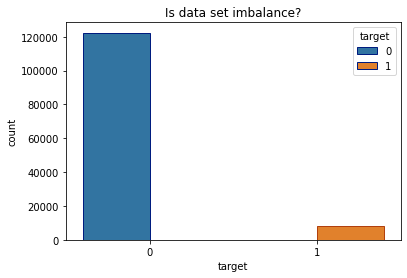

In [ ]:
#https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/#:~:text=a%20third%20variable.-,Syntax%3A,%2C%20y%2C%20hue%2C%20data)%3B
ax=sns.countplot(x='target',hue="target", data=train,edgecolor=sns.color_palette("dark", 3))
plt.title('Is data set imbalance?');

**Observation:-We can see that it is an imbalanced dataset**

**Pie Plot:-Checking the distribuition of the target variable:-**

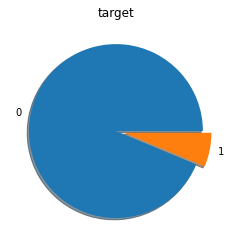

In [ ]:
#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
ax=train['target'].value_counts().plot.pie(explode=[0,0.1],shadow=True)
ax.set_title('target')
ax.set_ylabel('')
plt.show()

**Observations:-The insincere questions are less compare to sincere questions**

**Histogram**

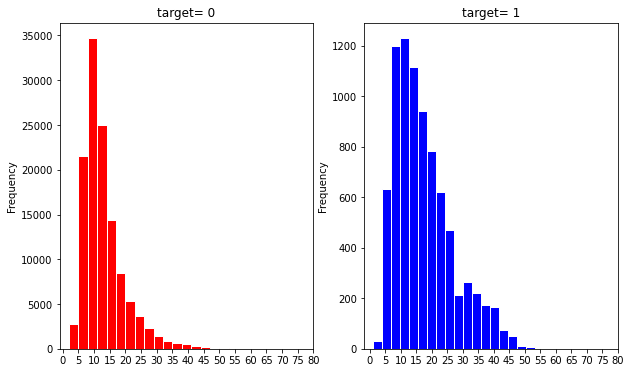

In [ ]:
#https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
f,ax=plt.subplots(1,2,figsize=(10,6))

train[train['target']==0].num_words.plot.hist(ax=ax[0],bins=20,edgecolor='white',color='red')

ax[0].set_title('target= 0')
x1=list(range(0,85,5))

ax[0].set_xticks(x1)
train[train['target']==1].num_words.plot.hist(ax=ax[1],color='blue',bins=20,edgecolor='white')

ax[1].set_title('target= 1')
x2=list(range(0,85,5))

ax[1].set_xticks(x2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


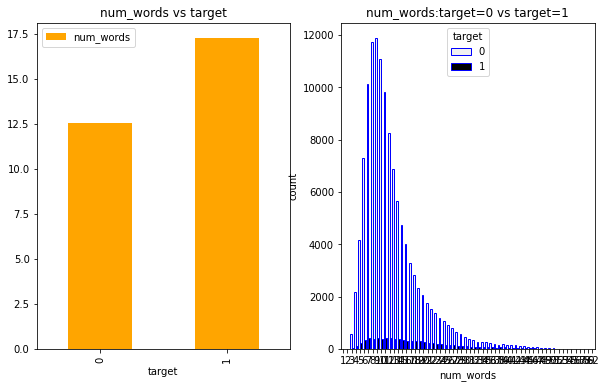

In [ ]:
#https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
f,ax=plt.subplots(1,2,figsize=(10,6))

train[['target','num_words']].groupby(['target']).mean().plot.bar(ax=ax[0],color='orange')

ax[0].set_title('num_words vs target')
sns.countplot('num_words',hue='target',data=train,ax=ax[1],color='black',edgecolor='blue')

ax[1].set_title('num_words:target=0 vs target=1')
plt.show()

<Figure size 432x288 with 0 Axes>

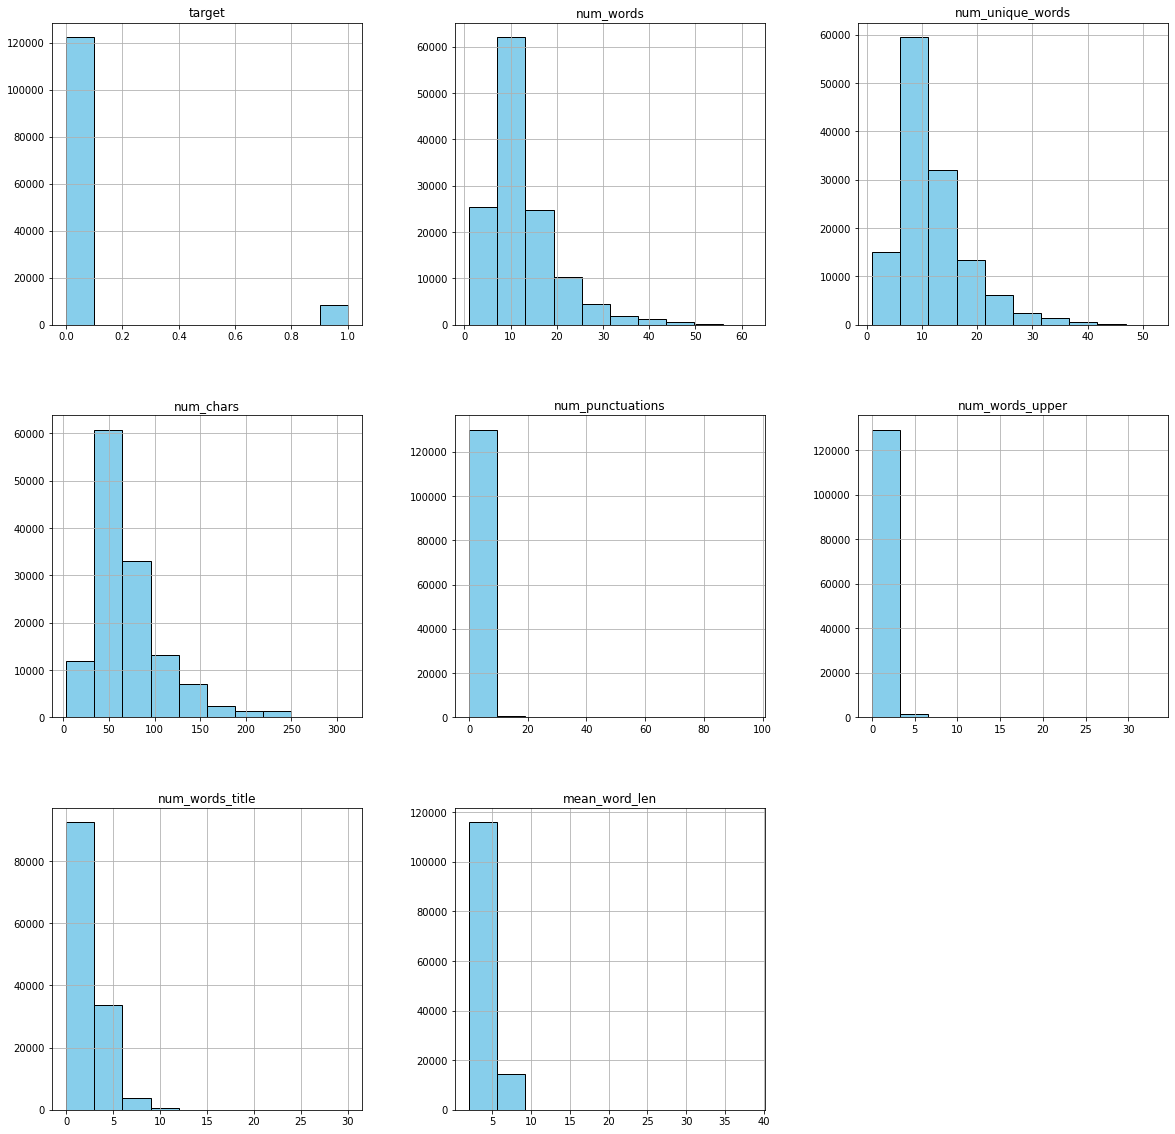

<Figure size 432x288 with 0 Axes>

In [ ]:
#https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
train.hist(figsize=(20,20),color='skyblue',edgecolor='black')
plt.figure()

**Violin Plot**

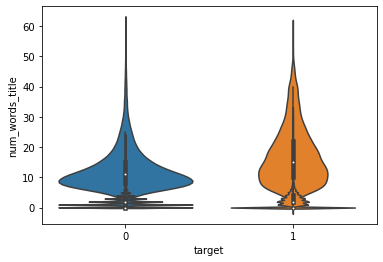

In [ ]:
#https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/
sns.violinplot(data=train,x="target", y="num_words")
sns.violinplot(data=train,x="target", y="num_words_upper")
sns.violinplot(data=train,x="target", y="num_words_title")

**KdePlot**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


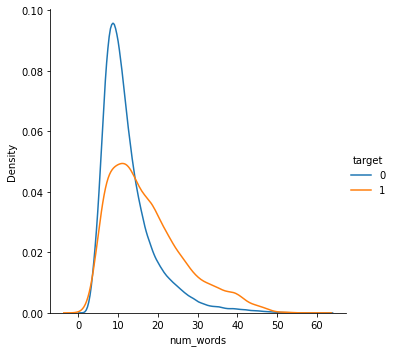

In [ ]:
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.FacetGrid(train, hue="target", size=5).map(sns.kdeplot, "num_words").add_legend()
plt.show()

**BoxPlots**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


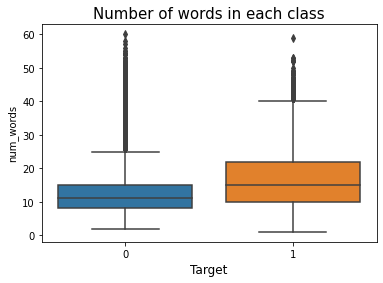

In [ ]:
#https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
train['num_words'].loc[train['num_words']>60] = 60 #truncation for better visuals

axes= sns.boxplot(x='target', y='num_words', data=train)

axes.set_xlabel('Target', fontsize=12)

axes.set_title("Number of words in each class", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


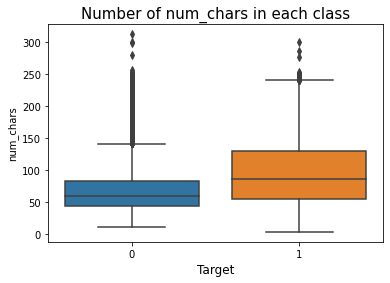

In [ ]:
#https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
train['num_chars'].loc[train['num_chars']>350] = 350 #truncation for better visuals

axes= sns.boxplot(x='target', y='num_chars', data=train)
axes.set_xlabel('Target', fontsize=12)
axes.set_title("Number of num_chars in each class", fontsize=15)
plt.show()

We can see that the insincere questions have more number of words as well as characters compared to sincere questions. So this might be a useful feature in our model.

**uni-gram**

In [ ]:
X = train.drop(['qid', 'target'], axis=1)
y = train['target']
X.shape, y.shape

((130612, 8), (130612,))

 https://www.kaggle.com/alaric81li215/eda-ml-for-beginners-by-a-beginner-bonus-on-qid

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
svd = TruncatedSVD(n_components=1, random_state=42)

In [ ]:
preprocessing_pipe = Pipeline([('vectorizer', vectorizer), ('svd', svd)])

In [ ]:
lsa_insincere = preprocessing_pipe.fit_transform(X[y==1]['question_text'])
topics_insincere = pd.DataFrame(svd.components_)

topics_insincere.columns = preprocessing_pipe.named_steps['vectorizer'].get_feature_names()

lsa_sincere = preprocessing_pipe.fit_transform(X[y==0]['question_text'])
topics_sincere = pd.DataFrame(svd.components_)

topics_sincere.columns = preprocessing_pipe.named_steps['vectorizer'].get_feature_names()

topics_insincere.shape, topics_sincere.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


((1, 12482), (1, 56356))

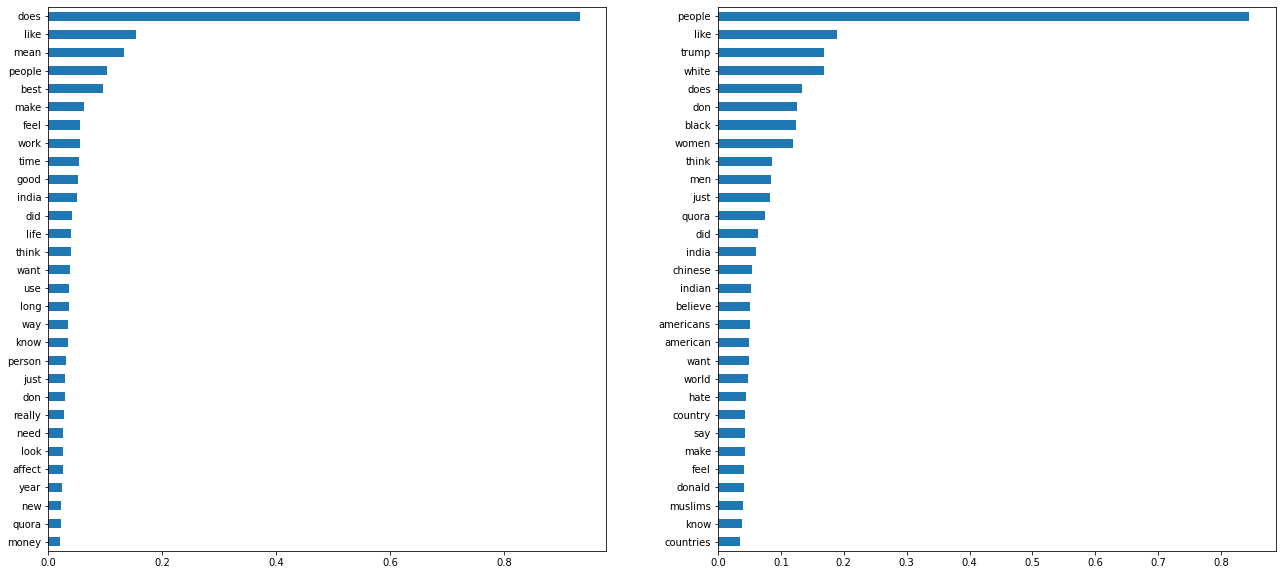

In [ ]:
# https://www.kaggle.com/alaric81li215/eda-ml-for-beginners-by-a-beginner-bonus-on-qid
fig, axes = plt.subplots(1, 2, figsize=(22,10));

topics_sincere.iloc[0].sort_values(ascending=False)[:30].sort_values().plot.barh(ax=axes[0]);
topics_insincere.iloc[0].sort_values(ascending=False)[:30].sort_values().plot.barh(ax=axes[1]);

**Observations:-Some words are more common in insincere questions, like 'white' and 'black', but other words of importance in our LSA are shared by both sincere and insincere questions at the same level, like 'people'. Maybe working on bi-grams or tri-grams will help us define more precislely what an insincere question looks like.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


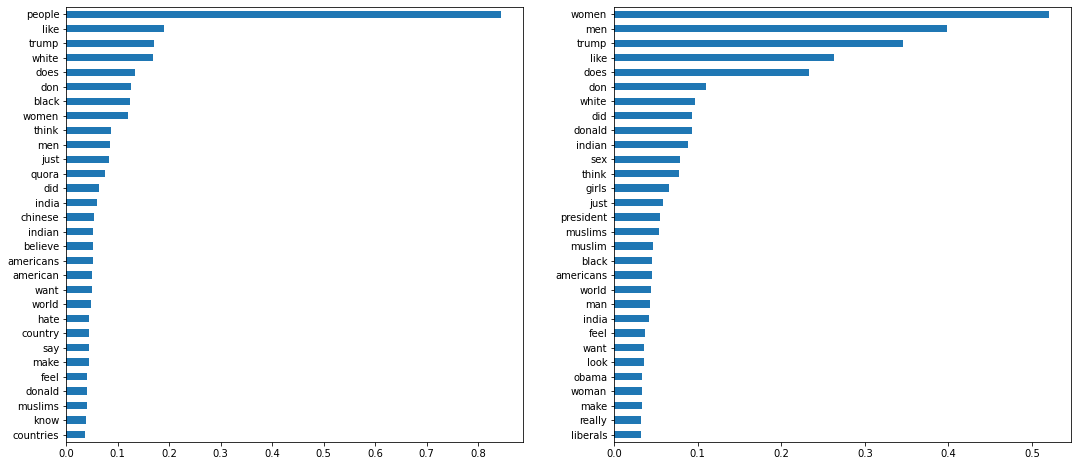

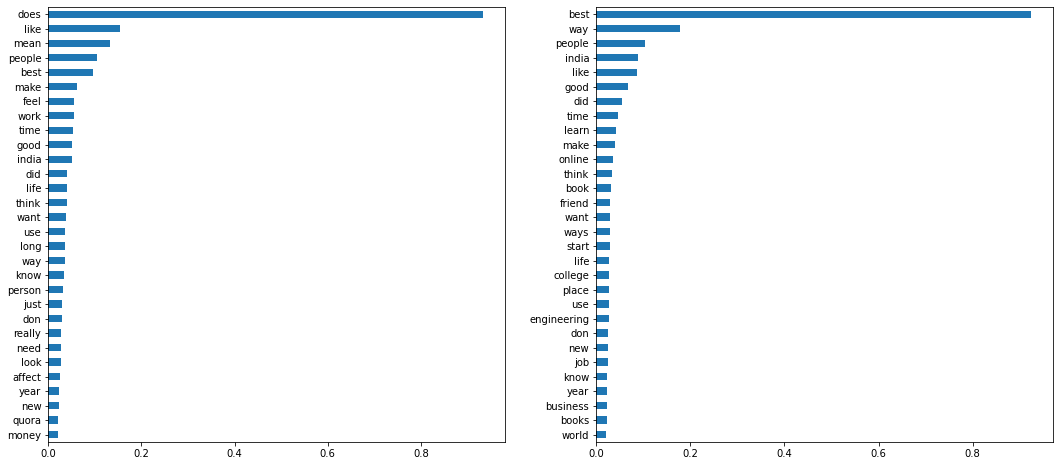

In [ ]:
# https://www.kaggle.com/alaric81li215/eda-ml-for-beginners-by-a-beginner-bonus-on-qid
vectorizer = CountVectorizer(stop_words='english')
svd = TruncatedSVD(n_components=2, random_state=42)

preprocessing_pipe = Pipeline([('vectorizer', vectorizer), ('svd', svd)])

# Building the latent semantic analysis dataframe for sincere and insincere questions

lsa_insincere_2 = preprocessing_pipe.fit_transform(X[y==1]['question_text'])
topics_insincere_2 = pd.DataFrame(svd.components_)
topics_insincere_2.columns = preprocessing_pipe.named_steps['vectorizer'].get_feature_names()

lsa_sincere_2 = preprocessing_pipe.fit_transform(X[y==0]['question_text'])
topics_sincere_2 = pd.DataFrame(svd.components_)
topics_sincere_2.columns = preprocessing_pipe.named_steps['vectorizer'].get_feature_names()


fig_1, axes_1 = plt.subplots(1, 2, figsize=(18, 8))
for i, ax in enumerate(axes_1.flat):
    topics_insincere_2.iloc[i].sort_values(ascending=False)[:30].sort_values().plot.barh(ax=ax)
    
fig_2, axes_2 = plt.subplots(1, 2, figsize=(18, 8))
for i, ax in enumerate(axes_2.flat):
    topics_sincere_2.iloc[i].sort_values(ascending=False)[:30].sort_values().plot.barh(ax=ax)

**bi-gram**

In [ ]:
# https://www.kaggle.com/alaric81li215/eda-ml-for-beginners-by-a-beginner-bonus-on-qid
vectorizer_22 = CountVectorizer(stop_words='english', ngram_range=(2, 2))
svd_10c = TruncatedSVD(n_components=9, random_state=42)

preprocessing_pipe = Pipeline([('vectorizer_22', vectorizer_22), ('svd_10c', svd_10c)])

# Building the latent semantic analysis dataframe for insincere questions

lsa_insincere_10c = preprocessing_pipe.fit_transform(X[y==1]['question_text'])
topics_insincere_10c = pd.DataFrame(svd_10c.components_)
topics_insincere_10c.columns = preprocessing_pipe.named_steps['vectorizer_22'].get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


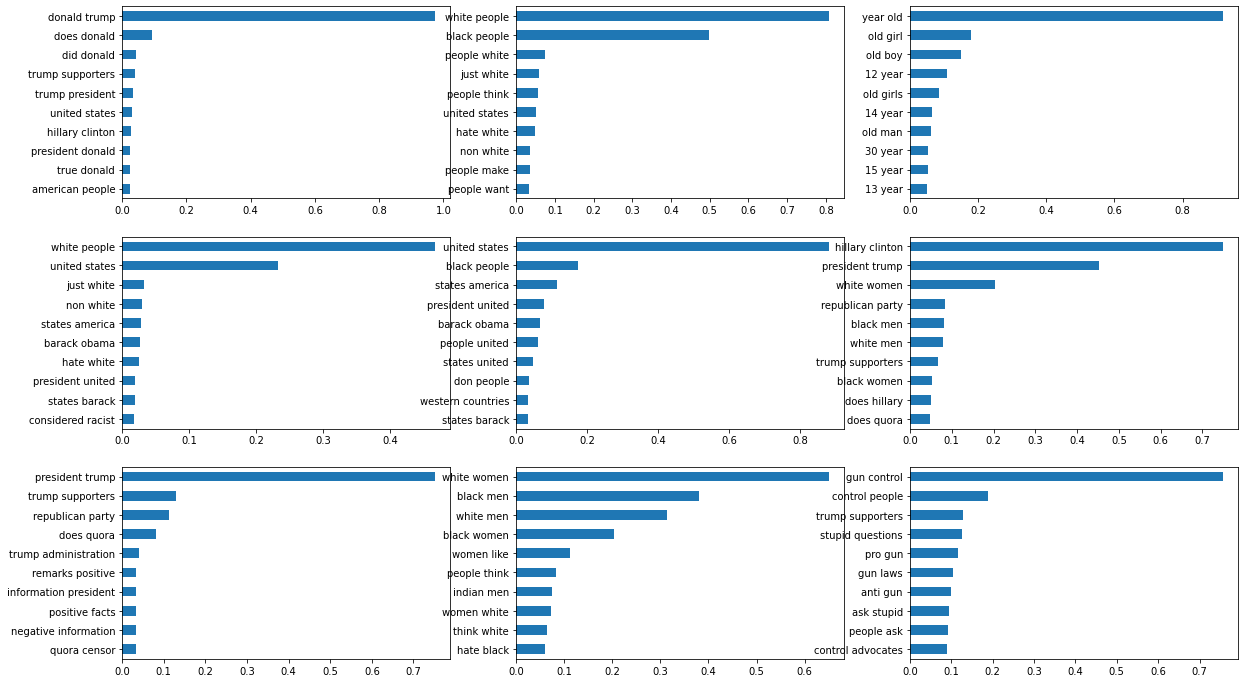

In [ ]:
# https://www.kaggle.com/alaric81li215/eda-ml-for-beginners-by-a-beginner-bonus-on-qid
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
for i, ax in enumerate(axes.flat):
    topics_insincere_10c.iloc[i].sort_values(ascending=False)[:10].sort_values().plot.barh(ax=ax)

**Observations:-Some words are more common in insincere questions, like 'white,black','Donald trump','hilary clinton','people hate'  Maybe working tri-grams will help us define more precislely what an insincere question looks like.**

**tri-gram**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


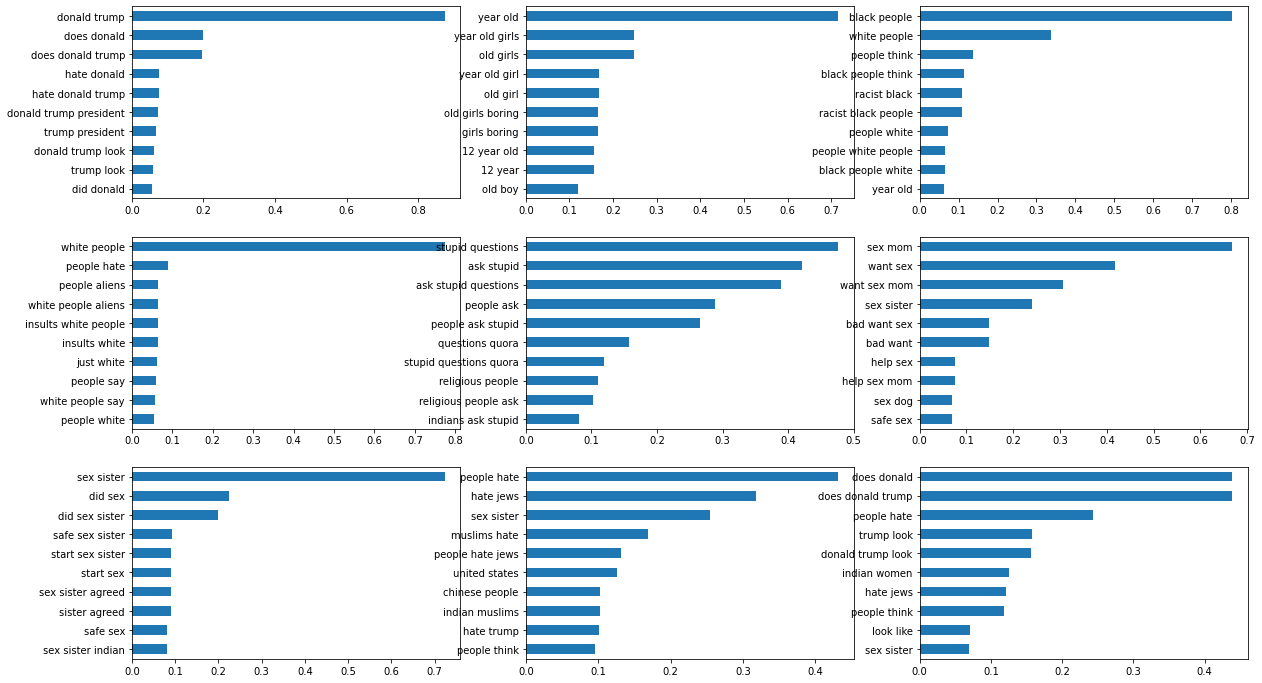

In [ ]:
# https://www.kaggle.com/alaric81li215/eda-ml-for-beginners-by-a-beginner-bonus-on-qid
vectorizer_23 = TfidfVectorizer(stop_words='english', ngram_range=(2, 3))
svd_9c = TruncatedSVD(n_components=9, random_state=42)

preprocessing_pipe = Pipeline([('vectorizer_23', vectorizer_23), ('svd_9c', svd_9c)])

# Building the latent semantic analysis dataframe for insincere questions

lsa_insincere_9c = preprocessing_pipe.fit_transform(X[y==1]['question_text'])
topics_insincere_9c = pd.DataFrame(svd_9c.components_)
topics_insincere_9c.columns = preprocessing_pipe.named_steps['vectorizer_23'].get_feature_names()

fig, axes = plt.subplots(3, 3, figsize=(20, 12))
for i, ax in enumerate(axes.flat):
    topics_insincere_9c.iloc[i].sort_values(ascending=False)[:10].sort_values().plot.barh(ax=ax)

**Observations:-Some words are more common in insincere questions, like 'black people hate','white people hate','want sex sister','people hate'** 

**Baseline Model:**
**Logistic Regression**

In [ ]:
X = train['question_text']
y = train['target']
X_test = test['question_text']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((104489,), (104489,), (26123,), (26123,))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#import pickle
# create an iterator object with write permission - model.pkl
#with open('/content/drive/MyDrive/model_pkl', 'wb') as files:
#    pickle.dump(lr, files)
#with open('/content/drive/MyDrive/model_pkl' , 'rb') as f:
#    lr = pickle.load(f)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

tfvec = TfidfVectorizer(stop_words='english', lowercase=False)
pipe_lr = Pipeline([
    ('vectorizer', tfvec),
    ('lr', lr )
])

In [ ]:
test_datapoint_func_1 = X_test.sample(1)

In [ ]:
test_datapoint_func_1

In [ ]:
pipe_lr.fit(X_train, y_train)

In [ ]:
y_pred_lr = pipe_lr.predict(X_val)

In [ ]:
import pickle
# create an iterator object with write permission - model.pkl
with open('/content/drive/MyDrive/model_pkl', 'wb') as files:
    pickle.dump(lr, files)
with open('/content/drive/MyDrive/vector_pkl', 'wb') as files:
    pickle.dump(pipe_lr, files)
#with open('/content/drive/MyDrive/model_pkl' , 'rb') as f:
#    lr = pickle.load(f)

In [ ]:
cm_lr = metrics.confusion_matrix(y_val, y_pred_lr)

ax = plt.gca()
sns.heatmap(cm_lr, cmap='Blues', cbar=False, annot=True, xticklabels=y_val.unique(), yticklabels=y_val.unique(), ax=ax);
ax.set_xlabel('y_pred');
ax.set_ylabel('y_true');
ax.set_title('Confusion Matrix');

cr = metrics.classification_report(y_val, y_pred_lr)
print(cr)

In [ ]:
metrics.f1_score(y_pred=y_pred_lr,y_true=y_val)

In [ ]:
y_sample = pipe_lr.predict(test_datapoint_func_1)

In [ ]:
print(y_sample)

In [ ]:
y_pred_test = pipe_lr.predict(X_test)

In [ ]:
len(y_pred_test)

In [ ]:
X_te=pd.read_csv(r'/content/drive/MyDrive/sample_submission.csv')

In [ ]:
#submitting the result
pd.DataFrame({'qid': X_te['qid'], 'prediction' : y_pred_test}).to_csv('/content/drive/MyDrive/Random_Model.csv',index = False)

**Randomforest model:-**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(class_weight='balanced_subsample')
tfvec = TfidfVectorizer(stop_words='english', lowercase=False)
pipe = Pipeline([
    ('vectorizer', tfvec),
    ('rf', rf )
])

In [ ]:
import pickle
# create an iterator object with write permission - model.pkl
with open('/content/drive/MyDrive/model_rf_pkl', 'wb') as files:
    pickle.dump(rf, files)
with open('/content/drive/MyDrive/vector_rf_pkl', 'wb') as files:
    pickle.dump(pipe, files)
#with open('/content/drive/MyDrive/model_pkl' , 'rb') as f:
#    lr = pickle.load(f)

In [ ]:
y_pred = pipe.predict(X_val)

In [ ]:
cm = metrics.confusion_matrix(y_val, y_pred)

ax = plt.gca()
sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, xticklabels=y_val.unique(), yticklabels=y_val.unique(), ax=ax);
ax.set_xlabel('y_pred');
ax.set_ylabel('y_true');
ax.set_title('Confusion Matrix');

cr = metrics.classification_report(y_val, y_pred)
print(cr)

In [ ]:
metrics.f1_score(y_pred=y_pred_lr,y_true=y_val)

**LSTM**

In [ ]:
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score,roc_auc_score
import tensorflow as tf
import keras as krs
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from keras import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.models import Model
import random as rn
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# some config values 
embed_size = 300 # how big is each word vector
max_features = 95000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 70 # max number of words in a question to use

In [ ]:
def model_lstm_du(embedding_matrix):
    inp = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    #x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(64, activation="relu")(conc)
    conc = Dropout(0.1)(conc)
    outp = Dense(1, activation="sigmoid")(conc)
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
import datetime
%load_ext tensorboard
!rm -rf ./logs/


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
def train_pred(model, epochs=1):
    for e in range(epochs):
       
        filepath="/content/drive/MyDrive/model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
        checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
        #lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
        log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
        callbacks_one=[checkpoint,tensorboard_callback1]
        model.fit(train_X, train_y, batch_size=512, epochs=1, validation_data=(val_X, val_y),callbacks=callbacks_one)
        pred_val_y = model.predict([val_X], batch_size=1024, verbose=0)

        best_thresh = 0.5
        best_score = 0.0
        for thresh in np.arange(0.1, 0.501, 0.01):
            
            thresh = np.round(thresh, 2)
            score = metrics.f1_score(val_y, (pred_val_y > thresh).astype(int))
            if score > best_score:
                best_thresh = thresh
                
                best_score = score

        print("Val F1 Score: {:.4f}".format(best_score))
    
    pred_test_y = model.predict([test_X], batch_size=1024, verbose=0)
    return pred_val_y, pred_test_y, best_score

In [ ]:
%%time
train_X, val_X, test_X, train_y, val_y, word_index = load_and_preprocess()

Test shape :  (375806, 2)
CPU times: user 2min, sys: 1.15 s, total: 2min 1s
Wall time: 2min 4s


In [ ]:
%%time
embedding_matrix_1 = load_glove_vector(word_index)

#embedding_matrix_2 = load_fasttext(word_index)
#embedding_matrix_3 = load_para(word_index)

/usr/local/lib/python3.7/dist-packages/IPython/core/magics/execution.py:1193: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code, glob, local_ns)


CPU times: user 1min 56s, sys: 14.2 s, total: 2min 10s
Wall time: 2min 20s


In [ ]:
%%time
import pickle
pred_val_y, pred_test_y, best_score = train_pred(model_lstm_du(embedding_matrix_1), epochs = 1)

2345/2347 [============================>.] - ETA: 0s - loss: 0.1281 - accuracy: 0.9508
Epoch 1: val_accuracy improved from -inf to 0.95664, saving model to /content/drive/MyDrive/model_save/weights-01-0.9566.hdf5
2347/2347 [==============================] - 65s 26ms/step - loss: 0.1281 - accuracy: 0.9508 - val_loss: 0.1074 - val_accuracy: 0.9566
Val F1 Score: 0.6509
CPU times: user 51.5 s, sys: 6.65 s, total: 58.2 s
Wall time: 1min 8s


In [ ]:
thresholds = []
for thresh in np.arange(0.1, 0.501, 0.01):
    
    thresh = np.round(thresh, 2)
    res = metrics.f1_score(val_y, (pred_val_y > thresh).astype(int))
    
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

F1 score at threshold 0.1 is 0.5882910892132582
F1 score at threshold 0.11 is 0.5970488081725313
F1 score at threshold 0.12 is 0.6045791394757217
F1 score at threshold 0.13 is 0.612316384180791
F1 score at threshold 0.14 is 0.6178263369752731
F1 score at threshold 0.15 is 0.622539831302718
F1 score at threshold 0.16 is 0.6275866181644701
F1 score at threshold 0.17 is 0.6299059751289051
F1 score at threshold 0.18 is 0.6340862928540654
F1 score at threshold 0.19 is 0.637534383595899
F1 score at threshold 0.2 is 0.6415022521093702
F1 score at threshold 0.21 is 0.6426596360362677
F1 score at threshold 0.22 is 0.6443558402509967
F1 score at threshold 0.23 is 0.6458278145695364
F1 score at threshold 0.24 is 0.6483803903158741
F1 score at threshold 0.25 is 0.6480363562368582
F1 score at threshold 0.26 is 0.6494095028838232
F1 score at threshold 0.27 is 0.6493506493506493
F1 score at threshold 0.28 is 0.6501230228471002
F1 score at threshold 0.29 is 0.6509052183173589
F1 score at threshold 0.3

In [ ]:
metrics.confusion_matrix(val_y,pred_val_y>best_thresh)

array([[94989,  3025],
       [ 1892,  4584]])

**Attention layer and lstm baselinemodel**

In [ ]:
embed_size = 300 # how big is each word vector
max_features = 55000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 27 # max number of words in a question to use
batch_size = 10000

In [ ]:
from tensorflow.keras import layers 
from tensorflow.keras.layers import Layer, InputSpec

In [ ]:
# https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-652-lb
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [ ]:
#F1 score and CLR

# https://www.kaggle.com/hireme/fun-api-keras-f1-metric-cyclical-learning-rate/code

def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
              gamma=1., scale_fn=None, scale_mode='cycle'):
    super(CyclicLR, self).__init__()

    self.base_lr = base_lr
    self.max_lr = max_lr
    self.step_size = step_size
    self.mode = mode
    self.gamma = gamma
    if scale_fn == None:
        if self.mode == 'triangular':
            self.scale_fn = lambda x: 1.
            self.scale_mode = 'cycle'
        elif self.mode == 'triangular2':
            self.scale_fn = lambda x: 1/(2.**(x-1))
            self.scale_mode = 'cycle'
        elif self.mode == 'exp_range':
            self.scale_fn = lambda x: gamma**(x)
            self.scale_mode = 'iterations'
    else:
        self.scale_fn = scale_fn
        self.scale_mode = scale_mode
    self.clr_iterations = 0.
    self.trn_iterations = 0.
    self.history = {}

    self._reset()

def _reset(self, new_base_lr=None, new_max_lr=None,
            new_step_size=None):
    
    if new_base_lr != None:
        self.base_lr = new_base_lr
    if new_max_lr != None:
        self.max_lr = new_max_lr
    if new_step_size != None:
        self.step_size = new_step_size
    self.clr_iterations = 0.
    
def clr(self):
    cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
    x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
    if self.scale_mode == 'cycle':
        return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
    else:
        return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
    
def on_train_begin(self, logs={}):
    logs = logs or {}

    if self.clr_iterations == 0:
        K.set_value(self.model.optimizer.lr, self.base_lr)
    else:
        K.set_value(self.model.optimizer.lr, self.clr())        
        
def on_batch_end(self, epoch, logs=None):
    
    logs = logs or {}
    self.trn_iterations += 1
    self.clr_iterations += 1

    self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
    self.history.setdefault('iterations', []).append(self.trn_iterations)

    for k, v in logs.items():
        self.history.setdefault(k, []).append(v)
    
    K.set_value(self.model.optimizer.lr, self.clr())

In [ ]:
def f1(y_true, y_pred):
    '''
    metric from here 
    https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
    '''
    def recall(y_true, y_pred):
      
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
#LSTM models
def model_lstm_atten(embedding_matrix):
    
    inp = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)
    x = SpatialDropout1D(0.1)(x)
    x = Bidirectional(CuDNNLSTM(40, return_sequences=True))(x)
    y = Bidirectional(CuDNNGRU(40, return_sequences=True))(x)
    
    atten_1 = Attention(maxlen)(x) # skip connect
    atten_2 = Attention(maxlen)(y)
    avg_pool = GlobalAveragePooling1D()(y)
    max_pool = GlobalMaxPooling1D()(y)
    
    conc = concatenate([atten_1, atten_2, avg_pool, max_pool])
    conc = Dense(16, activation="relu")(conc)
    conc = Dropout(0.1)(conc)
    outp = Dense(1, activation="sigmoid")(conc)    

    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1])
    
    return model

In [ ]:
#Train and predict

# https://www.kaggle.com/strideradu/word2vec-and-gensim-go-go-go
def train_pred(model, train_X, train_y, val_X, val_y, epochs=2, callback=None):
    for e in range(epochs):
        model.fit(train_X, train_y, batch_size=512, epochs=1, validation_data=(val_X, val_y), callbacks = callback, verbose=0)
        pred_val_y = model.predict([val_X], batch_size=1024, verbose=0)

        best_score = metrics.f1_score(val_y, (pred_val_y > 0.33).astype(int))
        print("Epoch: ", e, "-    Val F1 Score: {:.4f}".format(best_score))

    pred_test_y = model.predict([test_X], batch_size=1024, verbose=0)
    print('=' * 60)
    return pred_val_y, pred_test_y, best_score

In [ ]:
%%time
train_X, val_X, test_X, train_y, val_y, word_index = load_and_preprocess()

Test shape :  (375806, 2)
CPU times: user 1min 59s, sys: 978 ms, total: 2min
Wall time: 2min 1s


In [ ]:
%%time
train_X, val_X, test_X, train_y, val_y, word_index = load_and_preprocess()

In [ ]:
embedding_matrix_3 = load_paragraph(word_index)

## Simple average: http://aclweb.org/anthology/N18-2031

# We have presented an argument for averaging as
# a valid meta-embedding technique, and found experimental
# performance to be close to, or in some cases 
# better than that of concatenation, with the
# additional benefit of reduced dimensionality  


## Unweighted DME in https://arxiv.org/pdf/1804.07983.pdf

# “The downside of concatenating embeddings and 
#  giving that as input to an RNN encoder, however,
#  is that the network then quickly becomes inefficient
#  as we combine more and more embeddings.”
  
embedding_matrix = np.mean([embedding_matrix_1, embedding_matrix_3], axis = 0)
np.shape(embedding_matrix)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


(55000, 300)

In [ ]:
# https://www.kaggle.com/ryanzhang/tfidf-naivebayes-logreg-baseline

def threshold_search(y_true, y_proba):
    best_threshold = 0
    best_score = 0
    for threshold in [i * 0.01 for i in range(100)]:
        score = f1_score(y_true=y_true, y_pred=y_proba > threshold)
        if score > best_score:
            best_threshold = threshold
            best_score = score
    search_result = {'threshold': best_threshold, 'f1': best_score}
    return search_result
DATA_SPLIT_SEED = 2018
#filepath="/content/drive/MyDrive/model_save_1/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
#checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
#lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#callbacks_one=[checkpoint,tensorboard_callback1]
from sklearn.model_selection import GridSearchCV, StratifiedKFold
train_meta = np.zeros(train_y.shape)
test_meta = np.zeros(test_X.shape[0])
splits = list(StratifiedKFold(n_splits=4, shuffle=True, random_state=DATA_SPLIT_SEED).split(train_X, train_y))
for idx, (train_idx, valid_idx) in enumerate(splits):
        X_train = train_X[train_idx]
        y_train = train_y[train_idx]
        X_val = train_X[valid_idx]
        y_val = train_y[valid_idx]
        model = model_lstm_atten(embedding_matrix)
        pred_val_y, pred_test_y, best_score = train_pred(model, X_train, y_train, X_val, y_val, epochs = 1)
        train_meta[valid_idx] = pred_val_y.reshape(-1)
        test_meta += pred_test_y.reshape(-1) / len(splits)

Epoch:  0 -    Val F1 Score: 0.6466
Epoch:  0 -    Val F1 Score: 0.6251
Epoch:  0 -    Val F1 Score: 0.6364
Epoch:  0 -    Val F1 Score: 0.6202


In [ ]:
f1_score(y_true=train_y, y_pred=train_meta > 0.33)

0.63241026059629

**cnn model**

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import gc

In [8]:
## Settings:
    
# some config values 
embed_size = 300 # how big is each word vector
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a question to use

S_DROPOUT = 0.4
DROPOUT = 0.1

In [9]:
## split to train and val
train,  val = train_test_split(train, test_size=0.1, random_state=2018)

## fill up the missing values
train_X = train["question_text"].fillna("_na_").values
val_X = val["question_text"].fillna("_na_").values
test_X = test["question_text"].fillna("_na_").values

## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
val_X = tokenizer.texts_to_sequences(val_X)
test_X = tokenizer.texts_to_sequences(test_X)

## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)
val_X = pad_sequences(val_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

## Get the target values
train_y = train['target'].values
val_y = val['target'].values

In [10]:
EMBEDDING_FILE = '/content/glove.840B.300d/glove.840B.300d.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_1 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_1[i] = embedding_vector

del embeddings_index; gc.collect() 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


0

In [11]:
EMBEDDING_FILE = '/content/wiki-news-300d-1M/wiki-news-300d-1M.vec'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_2 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_2[i] = embedding_vector
        
del embeddings_index; gc.collect()    

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


0

In [13]:
EMBEDDING_FILE = '/content/paragram_300_sl999/paragram_300_sl999.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE, encoding="utf8", errors='ignore') if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_3 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_3[i] = embedding_vector

del embeddings_index; gc.collect()   

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


172

In [14]:
# https://www.kaggle.com/strideradu/word2vec-and-gensim-go-go-go
from gensim.models import KeyedVectors

EMBEDDING_FILE = '/content/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
#EMBEDDING_FILE = '/content/drive/MyDrive/glove.840B.300d/glove.840B.300d.txt'
embeddings_index = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_4 = (np.random.rand(nb_words, embed_size) - 0.5) / 5.0
for word, i in word_index.items():
    if i >= max_features: continue
    if word in embeddings_index:
        embedding_vector = embeddings_index.get_vector(word)
        embedding_matrix_4[i] = embedding_vector
        
del embeddings_index; gc.collect()  

0

In [15]:
embedding_matrix = np.concatenate((embedding_matrix_1, embedding_matrix_2, embedding_matrix_3, embedding_matrix_4), axis=1)  
del embedding_matrix_1, embedding_matrix_2, embedding_matrix_3, embedding_matrix_4
gc.collect()
np.shape(embedding_matrix)

(50000, 1200)

In [16]:
# https://www.kaggle.com/yekenot/2dcnn-textclassifier
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D

filter_sizes = [1,2,3,5]
num_filters = 36

inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size * 4, weights=[embedding_matrix])(inp)
x = SpatialDropout1D(S_DROPOUT)(x)
x = Reshape((maxlen, embed_size * 4, 1))(x)

maxpool_pool = []
for i in range(len(filter_sizes)):
    conv = Conv2D(num_filters, kernel_size=(filter_sizes[i], embed_size * 4),
                                 kernel_initializer='he_normal', activation='elu')(x)
    maxpool_pool.append(MaxPool2D(pool_size=(maxlen - filter_sizes[i] + 1, 1))(conv))

z = Concatenate(axis=1)(maxpool_pool)   
z = Flatten()(z)
z = Dropout(DROPOUT)(z)

outp = Dense(1, activation="sigmoid")(z)

model = Model(inputs=inp, outputs=outp)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%%time
model.fit(train_X, train_y, batch_size=512, epochs=2, validation_data=(val_X, val_y))


Epoch 1/2
 24/230 [==>...........................] - ETA: 7:02:34 - loss: 0.2430 - accuracy: 0.9333

In [ ]:
pred_val_cnn_y = model.predict([val_X], batch_size=1024, verbose=1)

In [ ]:
%%time
pred_test_cnn_y = model.predict([test_X], batch_size=1024, verbose=1)

In [ ]:
pred_val_y = pred_val_cnn_y  # two random numbers :)
pred_test_y = pred_test_cnn_y 

thresholds = []
for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    res = metrics.f1_score(val_y, (pred_val_y > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

In [ ]:
import keras
model=keras.models.load_model("/content/drive/MyDrive/model_save/weights-01-0.9566.hdf5")

In [ ]:
def test_preprocess(tests):
    tests['clean_text']=tests['question_text'].apply(clean_word)
    train =  pd.read_csv("/content/drive/My Drive/train.csv")
    train_X = train["clean_text"].fillna("_##_").values
    test_X = tests["clean_text"].fillna("_##_").values
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(train_X))
    test_X = tokenizer.texts_to_sequences(test_X)
    test_X = pad_sequences(test_X, maxlen=maxlen)
    return test_X

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
test_datapoint_func_1 = test_data.sample(1)
#predicting the output
val_x=test_preprocess(test_datapoint_func_1)

In [ ]:
def function_1(model,val_x):
  pred_val_y = model.predict([val_X], batch_size=1024, verbose=0)
  print("Predicted Probabilties for given question being insincere is/are: [0.5]  ",pred_val_y)
  print("class label for given query point is: [1]  ",pred_val_y)

# Pretty Table

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Logistic regression", "Random forest model", "lstm", "Attention layer and lstm ","cnn"]

x.add_row([0.506,0.5066,0.6509,0.6324,0.6486])


print(x)

+---------------------+---------------------+-------+---------------------------+--------+
| Logistic regression | Random forest model |  lstm | Attention layer and lstm  |  cnn   |
+---------------------+---------------------+-------+---------------------------+--------+
|        0.506        |        0.5066       | 0.683 |           0.672           | 0.6686 |
+---------------------+---------------------+-------+---------------------------+--------+


**Observations and Conclusions:-**


* We can observe that our lstm model perform well on the unseen data so we will use this model for predicting test data point.   
 

